In [1]:
import json
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats
import scipy
scipy.__version__

from sqlalchemy import create_engine
from sqlalchemy_utils import database_exists, create_database
import pymysql
pymysql.install_as_MySQLdb()
from urllib.parse import quote_plus as urlquote

In [2]:
df_2011 = pd.read_csv("MovieData/final_tmdb_data_2011.csv.gz")
df_2011.head(2)

,imdb_id,adult,backdrop_path,belongs_to_collection,budget,genres,homepage,id,original_language,original_title,...,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,certification
0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,tt0176694,0.0,/43VrmHOChLcAOG9S5tIFdsxr3u8.jpg,NaN,0.0,"[{'id': 16, 'name': 'Animation'}, {'id': 18, '...",NaN,116369.0,hu,Az ember tragédiája,...,0.0,166.0,"[{'english_name': 'Hungarian', 'iso_639_1': 'h...",Released,NaN,The Tragedy of Man,0.0,7.6,14.0,NaN


In [3]:
df_2012 = pd.read_csv("MovieData/final_tmdb_data_2012.csv.gz")
df_2012.head(2)

,imdb_id,adult,backdrop_path,belongs_to_collection,budget,genres,homepage,id,original_language,original_title,...,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,certification
0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,tt0249516,0.0,/t7zb6CnRQwhzQSq0apR4ESFYiWN.jpg,NaN,65000000.0,"[{'id': 12, 'name': 'Adventure'}, {'id': 35, '...",http://www.thresholdanimationstudios.com/video...,116977.0,en,Foodfight!,...,73706.0,91.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,NaN,Foodfight!,0.0,1.9,122.0,PG


In [4]:
df = pd.concat([df_2011, df_2012], ignore_index=True, sort=False)

In [5]:
df.head()

,imdb_id,adult,backdrop_path,belongs_to_collection,budget,genres,homepage,id,original_language,original_title,...,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,certification
0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,tt0176694,0.0,/43VrmHOChLcAOG9S5tIFdsxr3u8.jpg,NaN,0.0,"[{'id': 16, 'name': 'Animation'}, {'id': 18, '...",NaN,116369.0,hu,Az ember tragédiája,...,0.0,166.0,"[{'english_name': 'Hungarian', 'iso_639_1': 'h...",Released,NaN,The Tragedy of Man,0.0,7.6,14.0,NaN
2,tt0210470,0.0,NaN,NaN,0.0,"[{'id': 99, 'name': 'Documentary'}]",https://www.leightonpierce.com/cms/index.php?o...,239465.0,en,50 Feet of String,...,0.0,52.0,"[{'english_name': 'No Language', 'iso_639_1': ...",Released,NaN,50 Feet of String,0.0,6.0,3.0,NaN
3,tt0176694,0.0,/43VrmHOChLcAOG9S5tIFdsxr3u8.jpg,NaN,0.0,"[{'id': 16, 'name': 'Animation'}, {'id': 18, '...",NaN,116369.0,hu,Az ember tragédiája,...,0.0,166.0,"[{'english_name': 'Hungarian', 'iso_639_1': 'h...",Released,NaN,The Tragedy of Man,0.0,7.6,14.0,NaN
4,tt0210470,0.0,NaN,NaN,0.0,"[{'id': 99, 'name': 'Documentary'}]",https://www.leightonpierce.com/cms/index.php?o...,239465.0,en,50 Feet of String,...,0.0,52.0,"[{'english_name': 'No Language', 'iso_639_1': ...",Released,NaN,50 Feet of String,0.0,6.0,3.0,NaN


In [8]:
# Setting the id as the index
df = df.set_index('imdb_id')
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6385 entries, 0 to tt9844062
Data columns (total 25 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   adult                  6383 non-null   float64
 1   backdrop_path          3647 non-null   object 
 2   belongs_to_collection  470 non-null    object 
 3   budget                 6383 non-null   float64
 4   genres                 6383 non-null   object 
 5   homepage               1644 non-null   object 
 6   id                     6383 non-null   float64
 7   original_language      6383 non-null   object 
 8   original_title         6383 non-null   object 
 9   overview               6233 non-null   object 
 10  popularity             6383 non-null   float64
 11  poster_path            5608 non-null   object 
 12  production_companies   6383 non-null   object 
 13  production_countries   6383 non-null   object 
 14  release_date           6263 non-null   object 
 15  reve

In [15]:
df = df.dropna()

Q1: does the MPAA rating of a movie (G/PG/PG-13/R) affect how much revenue the movie generates?
-

1:State the Hypothesis & Null Hypothesis:

(Null Hypothesis): The MPAA rating of a movie (G/PG/PG-13/R) does not affect how much revenue the movie generates.

(Alternative Hypothesis): The MPAA rating of a movie (G/PG/PG-13/R) does affect how much revenue the movie generates.

2. Determine the correct test to perform.

   numerical data because of revenue, more than 2 groups/samples so we will do ANOVA and/or Tukey.

In [16]:
#Visualize and separate data for hypothesis
## check the col that contains the measurement
df['revenue'].describe()

count    8.000000e+01
mean     2.770053e+08
std      3.374677e+08
min      0.000000e+00
25%      1.242850e+07
50%      1.466046e+08
75%      4.148475e+08
max      1.518816e+09
Name: revenue, dtype: float64

In [17]:
## check the col that contains info on movie rating
df['certification'].value_counts()

PG-13    29
R        23
PG       16
NR        8
G         4
Name: certification, dtype: int64

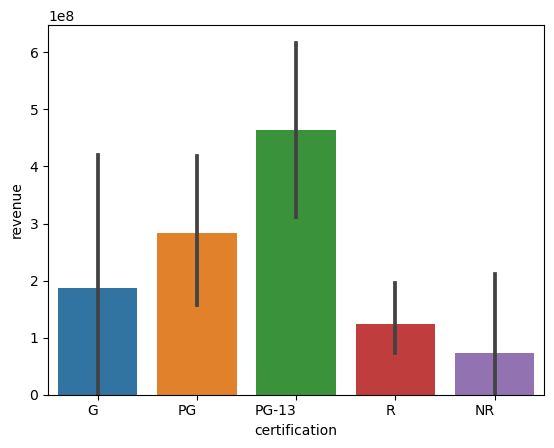

In [18]:
ax = sns.barplot(data=df, x='certification', y='revenue')
ax.set_xticklabels(ax.get_xticklabels(), ha='right');

In [19]:
needed_cols = ['certification','revenue']
df[needed_cols]

,certification,revenue
imdb_id,,
tt0377981,G,189712432.0
tt0448694,PG,554987477.0
tt0458339,PG-13,370569774.0
tt0472181,PG,563749323.0
tt0472399,R,51070807.0
...,...,...
tt2105044,R,100345.0
tt2109184,R,142802657.0
tt2215285,PG-13,66900000.0


In [26]:
## Create a dictionary
groups ={}

for certification in df['certification'].unique():
    temp = df.loc[df['certification']== certification, 'revenue']
    groups[certification] = temp

groups.keys()

dict_keys(['G', 'PG', 'PG-13', 'R', 'NR'])

3. Testing Assumptions

No significant outliers, 
Normalit and 
Equal Variance

In [27]:
## Loop through groups dict
for certification, data in groups.items():

    ## determine if there are any outliers
    outliers = np.abs(stats.zscore(data)) > 3
    
    ## print a statement about how many outliers for which group name
    print(f"There were {outliers.sum()} outliers in the {certification} group.")

    ## Remove the outiers from data and overwrite the sector data in the dict
    data = data.loc[~outliers]
    groups[certification] = data

There were 0 outliers in the G group.
There were 0 outliers in the PG group.
There were 0 outliers in the PG-13 group.
There were 1 outliers in the R group.
There were 0 outliers in the NR group.


In [29]:
## Running normal test on each group and confirming there are >20 in each group

## Save a list with an inner list of column names
norm_results = [['group','n','pval','sig?']]


## loop through group dict
for certification, data in groups.items():
    ## calculate normaltest results
    stat, p = stats.normaltest(data)
    
    ## Append the right info into norm_resutls (as a list)
    norm_results.append([certification,len(data), p, p<.05])
    
    
## Make norm_results a dataframe (first row is columns, everything else data)
normal_results = pd.DataFrame(norm_results[1:], columns = norm_results[0])
normal_results

ValueError: skewtest is not valid with less than 8 samples; 4 samples were given.

In [ ]:
#Test for Equal Variances


In [30]:
## Use Levene's test for equal variance
result = stats.levene(*groups.values())
print(result)

LeveneResult(statistic=5.11709610000194, pvalue=0.0010740487835328208)


In [31]:
## Use an if-else to help interpret the p-value
if result.pvalue < .05:
    print(f"The groups do NOT have equal variance.")
else:
    print(f"The groups DO have equal variance.")

The groups do NOT have equal variance.


We met the assumption of outliers but did NOT meet the assumption of equal variance.
We wanted to run an ANOVA test but will need to use a Kurskal-Wallis test instead.

4: Perform the Test & Interpret the Result

In [32]:
## Running Krukal Test for Original Hypothesis
result = stats.kruskal(*groups.values())
print(result)
result.pvalue<.05

KruskalResult(statistic=20.604043185127445, pvalue=0.00037935429249491017)


True

**Our Kruskal Wallis test returned a p-value MUCH less than .05. We reject the null hypothesis and conclude that there is a significant impact on revenue based on certification.**


STEP 5: Post-hoc multiple comparison tests (if needed)

In [33]:
## Post Hoc
from statsmodels.stats.multicomp import pairwise_tukeyhsd

In [34]:
## slice a test sector
temp = groups['G']
temp

imdb_id
tt0377981    189712432.0
tt1216475    559852396.0
tt1739212            0.0
tt1961324            0.0
Name: revenue, dtype: float64

In [35]:
## test making a datafrae 
pd.DataFrame({'revenue':temp, 'certification':'G'})

,revenue,certification
imdb_id,,
tt0377981,189712432.0,G
tt1216475,559852396.0,G
tt1739212,0.0,G
tt1961324,0.0,G


In [36]:
## make a list for saving the dataframes to
tukeys_dfs = []

## Loop through groups dict's items
for certification, temp in groups.items():
    
    ## make a temp_df with the data and the sector name
    temp_df = pd.DataFrame({'revenue':temp, 'certification':certification})
    
    ## append to tukeys_dfs
    tukeys_dfs.append(temp_df)
    
## concatenate them into 1 dataframe    
tukeys_data = pd.concat(tukeys_dfs)
tukeys_data

,revenue,certification
imdb_id,,
tt0377981,189712432.0,G
tt1216475,559852396.0,G
tt1739212,0.0,G
tt1961324,0.0,G
tt0448694,554987477.0,PG
...,...,...
tt1637725,549368315.0,NR
tt1844025,20335408.0,NR
tt2005156,0.0,NR


In [37]:
## save the values 
values = tukeys_data['revenue']
labels = tukeys_data['certification']

## perform tukey's multiple comparison test and display the summary
tukeys_results = pairwise_tukeyhsd(values,labels)
tukeys_results.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
G,NR,-115034676.75,0.9718,-635709384.3773,405640030.8773,False
G,PG,95551769.625,0.9801,-379757034.5248,570860573.7748,False
G,PG-13,277054853.069,0.4353,-176446746.5777,730556452.7156,False
G,R,-85153927.5909,0.9856,-547318004.7858,377010149.604,False
NR,PG,210586446.375,0.5026,-157586170.1806,578759062.9306,False
NR,PG-13,392089529.819,0.0155,52536415.9161,731642643.7219,True
NR,R,29880749.1591,0.9993,-321158067.1113,380919565.4295,False
PG,PG-13,181503083.444,0.3177,-83284803.9314,446290970.8193,False
PG,R,-180705697.2159,0.3764,-460070259.5141,98658865.0823,False
PG-13,R,-362208780.6599,0.0007,-602603872.6394,-121813688.6803,True


In [38]:
## optional -slicing out dataframe from results
summary = tukeys_results.summary()
tukeys_df = pd.DataFrame(summary.data[1:], columns=summary.data[0])
tukeys_df

,group1,group2,meandiff,p-adj,lower,upper,reject
0,G,NR,-1.150347e+08,0.9718,-6.357094e+08,4.056400e+08,False
1,G,PG,9.555177e+07,0.9801,-3.797570e+08,5.708606e+08,False
2,G,PG-13,2.770549e+08,0.4353,-1.764467e+08,7.305565e+08,False
3,G,R,-8.515393e+07,0.9856,-5.473180e+08,3.770101e+08,False
4,NR,PG,2.105864e+08,0.5026,-1.575862e+08,5.787591e+08,False
5,NR,PG-13,3.920895e+08,0.0155,5.253642e+07,7.316426e+08,True
6,NR,R,2.988075e+07,0.9993,-3.211581e+08,3.809196e+08,False
7,PG,PG-13,1.815031e+08,0.3177,-8.328480e+07,4.462910e+08,False
8,PG,R,-1.807057e+08,0.3764,-4.600703e+08,9.865887e+07,False
9,PG-13,R,-3.622088e+08,0.0007,-6.026039e+08,-1.218137e+08,True


C:\Users\12103\AppData\Local\Temp\ipykernel_16544\2645591382.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 68)` for the same effect.

  ax = sns.barplot(data=tukeys_data, x='certification', y='revenue', ci=68)


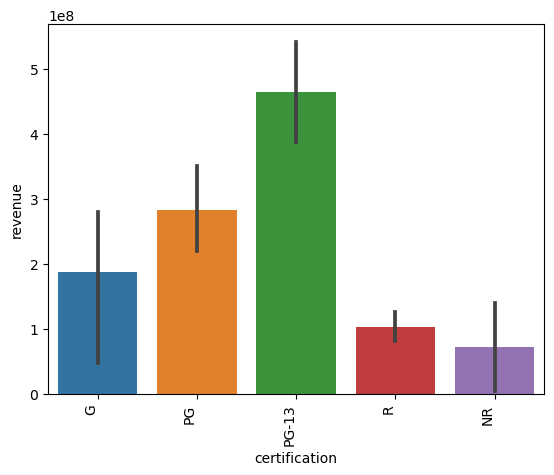

In [41]:
## make a barplot of final data to go with results
ax = sns.barplot(data=tukeys_data, x='certification', y='revenue', ci=68)
ax.set_xticklabels(ax.get_xticklabels(), rotation='vertical', ha='right');

In [42]:
## Not significantly different
tukeys_df[tukeys_df['reject'] ==False]

,group1,group2,meandiff,p-adj,lower,upper,reject
0,G,NR,-1.150347e+08,0.9718,-6.357094e+08,4.056400e+08,False
1,G,PG,9.555177e+07,0.9801,-3.797570e+08,5.708606e+08,False
2,G,PG-13,2.770549e+08,0.4353,-1.764467e+08,7.305565e+08,False
3,G,R,-8.515393e+07,0.9856,-5.473180e+08,3.770101e+08,False
4,NR,PG,2.105864e+08,0.5026,-1.575862e+08,5.787591e+08,False
6,NR,R,2.988075e+07,0.9993,-3.211581e+08,3.809196e+08,False
7,PG,PG-13,1.815031e+08,0.3177,-8.328480e+07,4.462910e+08,False
8,PG,R,-1.807057e+08,0.3764,-4.600703e+08,9.865887e+07,False


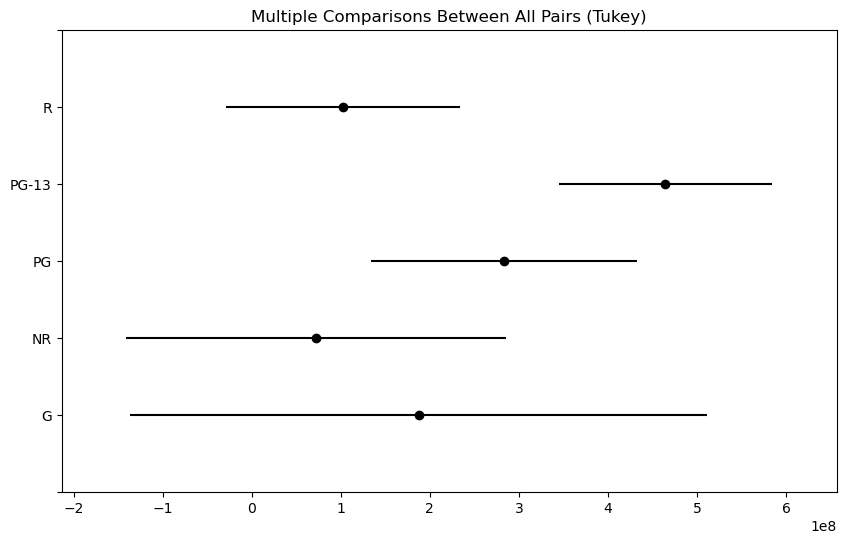

In [43]:
## also can use built-in plot tukeys_reuslts.plot_simultaneous
tukeys_results.plot_simultaneous();

**Certification DOES have a significant impact on revenue. The lowest is 'NR' and highest is 'PG-13'**

Q2: Does budget impact revenue?
-

1. State the Hypothesis & Null Hypothesis

Null Hypothesis: budget has no significant impact on revenue

Alternative hypothesis: budget has a significant impact on revenue

2. Determine the correct test to perform.

numerical, more than 2 samples, ANOVA and/or Tukey

In [47]:
df['budget'].value_counts()

0.0            17
130000000.0     4
5000000.0       3
150000000.0     3
35000000.0      3
40000000.0      2
30000000.0      2
45000000.0      2
200000000.0     2
125000000.0     2
17000000.0      2
250000000.0     2
215000000.0     1
42000000.0      1
48000000.0      1
75000000.0      1
79000000.0      1
225000000.0     1
36000000.0      1
70000000.0      1
12000000.0      1
220000000.0     1
95000000.0      1
170000000.0     1
10500000.0      1
165000000.0     1
65000000.0      1
20000000.0      1
50000000.0      1
21000000.0      1
85000000.0      1
1100000.0       1
140000000.0     1
110000000.0     1
15000000.0      1
57000000.0      1
19000000.0      1
160000000.0     1
379000000.0     1
93000000.0      1
195000000.0     1
80000000.0      1
25000000.0      1
32000000.0      1
37000000.0      1
90000000.0      1
4478250.0       1
25000.0         1
Name: budget, dtype: int64

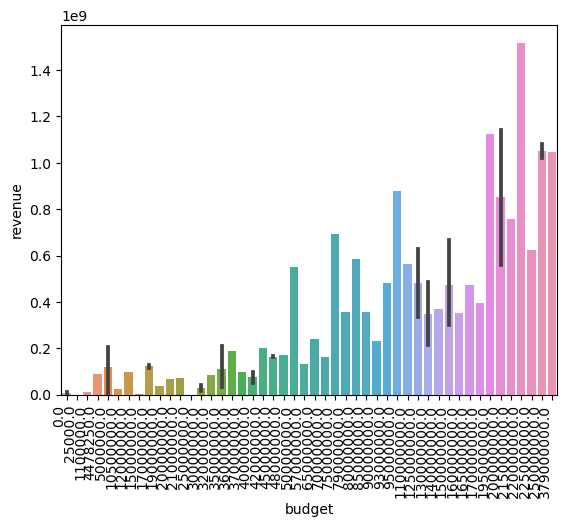

In [50]:
ax = sns.barplot(data=df, x='budget', y='revenue')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha='right');

In [52]:
needed_cols = ['budget','revenue']
df[needed_cols]

,budget,revenue
imdb_id,,
tt0377981,36000000.0,189712432.0
tt0448694,130000000.0,554987477.0
tt0458339,140000000.0,370569774.0
tt0472181,110000000.0,563749323.0
tt0472399,40000000.0,51070807.0
...,...,...
tt2105044,0.0,100345.0
tt2109184,5000000.0,142802657.0
tt2215285,20000000.0,66900000.0


In [53]:
## Create a dictionary with each group as key and funded_amount as values
groups ={}

for budget in df['budget'].unique():
    temp = df.loc[df['budget']== budget, 'revenue']
    groups[budget] = temp

groups.keys()

dict_keys([36000000.0, 130000000.0, 140000000.0, 110000000.0, 40000000.0, 15000000.0, 150000000.0, 30000000.0, 35000000.0, 57000000.0, 45000000.0, 200000000.0, 19000000.0, 160000000.0, 379000000.0, 93000000.0, 195000000.0, 80000000.0, 25000000.0, 0.0, 32000000.0, 125000000.0, 37000000.0, 90000000.0, 21000000.0, 4478250.0, 5000000.0, 1100000.0, 85000000.0, 220000000.0, 250000000.0, 215000000.0, 42000000.0, 75000000.0, 79000000.0, 225000000.0, 48000000.0, 70000000.0, 17000000.0, 12000000.0, 50000000.0, 95000000.0, 170000000.0, 10500000.0, 165000000.0, 65000000.0, 20000000.0, 25000.0])

3. Testing Assumptions

No significant outliers, 
Normalit, y
Equal Variance

In [54]:
## Loop through groups dict
for budget, data in groups.items():

    ## determine if there are any outliers
    outliers = np.abs(stats.zscore(data)) > 3
    
    ## print a statement about how many outliers for which group name
    print(f"There were {outliers.sum()} outliers in the {sector} group.")

    ## Remove the outiers from data and overwrite the sector data in the dict
    data = data.loc[~outliers]
    groups[budget] = data

There were 0 outliers in the G group.
There were 0 outliers in the G group.
There were 0 outliers in the G group.
There were 0 outliers in the G group.
There were 0 outliers in the G group.
There were 0 outliers in the G group.
There were 0 outliers in the G group.
There were 0 outliers in the G group.
There were 0 outliers in the G group.
There were 0 outliers in the G group.
There were 0 outliers in the G group.
There were 0 outliers in the G group.
There were 0 outliers in the G group.
There were 0 outliers in the G group.
There were 0 outliers in the G group.
There were 0 outliers in the G group.
There were 0 outliers in the G group.
There were 0 outliers in the G group.
There were 0 outliers in the G group.
There were 1 outliers in the G group.
There were 0 outliers in the G group.
There were 0 outliers in the G group.
There were 0 outliers in the G group.
There were 0 outliers in the G group.
There were 0 outliers in the G group.
There were 0 outliers in the G group.
There were 0

In [55]:
## Running normal test on each group and confirming there are >20 in each group

## Save a list with an inner list of column names
norm_results = [['group','n','pval','sig?']]


## loop through group dict
for budget, data in groups.items():
    ## calculate normaltest results
    stat, p = stats.normaltest(data)
    
    ## Append the right info into norm_resutls (as a list)
    norm_results.append([budget,len(data), p, p<.05])
    
    
## Make norm_results a dataframe (first row is columns, everything else data)
normal_results = pd.DataFrame(norm_results[1:], columns = norm_results[0])
normal_results

C:\Users\12103\anaconda3\envs\dojo-env\lib\site-packages\scipy\stats\_stats_py.py:1633: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  b2 = skew(a, axis)


ValueError: skewtest is not valid with less than 8 samples; 1 samples were given.

We failed the assumption of normality, but our groups are large enough that we can safely disregard/ignore the assumption of normality.

In [56]:
## Use Levene's test for equal variance
result = stats.levene(*groups.values())
print(result)

LeveneResult(statistic=3.086991883458787, pvalue=0.0006798119291773087)


In [57]:
## Use an if-else to help interpret the p-value
if result.pvalue < .05:
    print(f"The groups do NOT have equal variance.")
else:
    print(f"The groups DO have equal variance.")

The groups do NOT have equal variance.


We wanted to run an ANOVA test but will need to use a Kurskal-Wallis test instead.

4:Final Hypothesis Test

In [58]:
## Running Krukal Test for Original Hypothesis
result = stats.kruskal(*groups.values())
print(result)
result.pvalue<.05

KruskalResult(statistic=74.3050982426166, pvalue=0.006762160755641608)


True

Our Kruskal Wallis test returned a p-value MUCH less than .05. We reject the null hypothesis and conclude that budget has a significant impact on revenue

5:Post-Hoc Multiple Comparison Test

In [61]:
## slice a test 
temp = groups[165000000.0]
temp

imdb_id
tt1772341    471222889.0
Name: revenue, dtype: float64

In [62]:
## test making a datafrae from the test 
pd.DataFrame({'budget':temp, 'revenue':'165000000.0'})

,budget,revenue
imdb_id,,
tt1772341,471222889.0,165000000.0


In [66]:
## make a list for saving the dataframes to
tukeys_dfs = []

## Loop through groups dict's items
for budget, temp in groups.items():
    
    ## make a temp_df with the name
    temp_df = pd.DataFrame({'revenue':temp, 'budget':budget})
    
    ## append to tukeys_dfs
    tukeys_dfs.append(temp_df)
    
## concatenate them into 1 dataframe    
tukeys_data = pd.concat(tukeys_dfs)
tukeys_data

,revenue,budget
imdb_id,,
tt0377981,189712432.0,36000000.0
tt0448694,554987477.0,130000000.0
tt1402488,150406466.0,130000000.0
tt1194173,276600000.0,130000000.0
tt1446714,403354469.0,130000000.0
...,...,...
tt1764625,23000000.0,10500000.0
tt1772341,471222889.0,165000000.0
tt1855325,240200000.0,65000000.0


In [67]:
## save the values 
values = tukeys_data['budget']
labels = tukeys_data['revenue']

## perform tukey's multiple comparison test and display the summary
tukeys_results = pairwise_tukeyhsd(values,labels)
tukeys_results.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
0.0,65708.0,24997727.2727,0.0,24953849.4917,25041605.0537,True
0.0,100345.0,-2272.7273,1.0,-46150.5083,41605.0537,False
0.0,193425.0,-2272.7273,1.0,-46150.5083,41605.0537,False
0.0,2325035.0,-2272.7273,1.0,-46150.5083,41605.0537,False
0.0,4627375.0,14997727.2727,0.0,14953849.4917,15041605.0537,True
0.0,6483963.0,-2272.7273,1.0,-46150.5083,41605.0537,False
0.0,7401480.0,-2272.7273,1.0,-46150.5083,41605.0537,False
0.0,8493728.0,4997727.2727,0.0,4953849.4917,5041605.0537,True
0.0,9148519.0,1097727.2727,0.0,1053849.4917,1141605.0537,True
0.0,13521829.0,29997727.2727,0.0,29953849.4917,30041605.0537,True


In [68]:
## optional -slicing out dataframe from results
summary = tukeys_results.summary()
tukeys_df = pd.DataFrame(summary.data[1:], columns=summary.data[0])
tukeys_df

,group1,group2,meandiff,p-adj,lower,upper,reject
0,0.000000e+00,6.570800e+04,2.499773e+07,0.0,2.495385e+07,2.504161e+07,True
1,0.000000e+00,1.003450e+05,-2.272727e+03,1.0,-4.615051e+04,4.160505e+04,False
2,0.000000e+00,1.934250e+05,-2.272727e+03,1.0,-4.615051e+04,4.160505e+04,False
3,0.000000e+00,2.325035e+06,-2.272727e+03,1.0,-4.615051e+04,4.160505e+04,False
4,0.000000e+00,4.627375e+06,1.499773e+07,0.0,1.495385e+07,1.504161e+07,True
...,...,...,...,...,...,...,...
2341,1.081041e+09,1.142471e+09,-5.000000e+07,0.0,-5.005941e+07,-4.994059e+07,True
2342,1.081041e+09,1.518816e+09,-3.000000e+07,0.0,-3.005941e+07,-2.994059e+07,True
2343,1.123800e+09,1.142471e+09,5.000000e+06,0.0,4.940589e+06,5.059411e+06,True
2344,1.123800e+09,1.518816e+09,2.500000e+07,0.0,2.494059e+07,2.505941e+07,True


C:\Users\12103\AppData\Local\Temp\ipykernel_16544\3372400381.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 68)` for the same effect.

  ax = sns.barplot(data=tukeys_data, x='budget', y='revenue', ci=68)


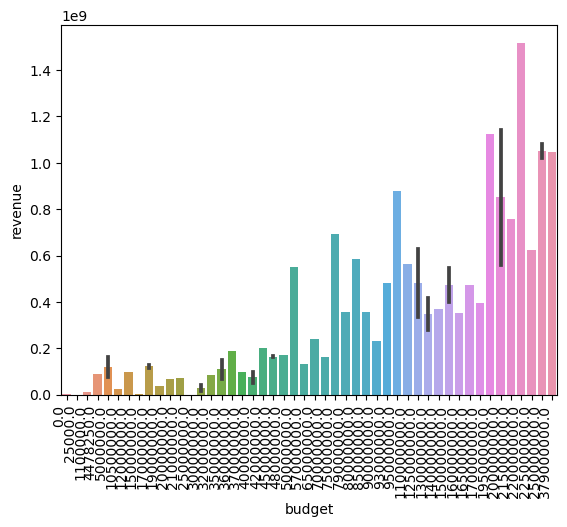

In [69]:
## make a barplot of final data to go with results
ax = sns.barplot(data=tukeys_data, x='budget', y='revenue', ci=68)
ax.set_xticklabels(ax.get_xticklabels(), rotation='vertical', ha='right');

In [70]:
## Not significantly different
tukeys_df[tukeys_df['reject'] ==False]

,group1,group2,meandiff,p-adj,lower,upper,reject
1,0.000000e+00,1.003450e+05,-2272.7273,1.0,-46150.5083,41605.0537,False
2,0.000000e+00,1.934250e+05,-2272.7273,1.0,-46150.5083,41605.0537,False
3,0.000000e+00,2.325035e+06,-2272.7273,1.0,-46150.5083,41605.0537,False
5,0.000000e+00,6.483963e+06,-2272.7273,1.0,-46150.5083,41605.0537,False
6,0.000000e+00,7.401480e+06,-2272.7273,1.0,-46150.5083,41605.0537,False
10,0.000000e+00,2.033541e+07,-2272.7273,1.0,-46150.5083,41605.0537,False
135,1.003450e+05,1.934250e+05,0.0000,1.0,-59410.7963,59410.7963,False
136,1.003450e+05,2.325035e+06,0.0000,1.0,-59410.7963,59410.7963,False
138,1.003450e+05,6.483963e+06,0.0000,1.0,-59410.7963,59410.7963,False
139,1.003450e+05,7.401480e+06,0.0000,1.0,-59410.7963,59410.7963,False


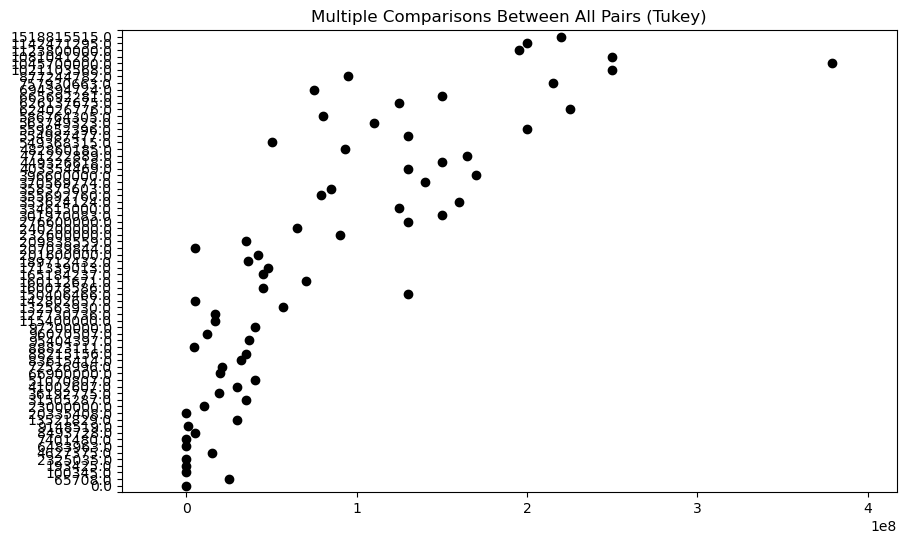

In [71]:
## also can use built-in plot tukeys_reuslts.plot_simultaneous
tukeys_results.plot_simultaneous();

As we can see, budget has a large impact on revenue, the higher the budget, typically the higher the revenue. Highest revenue was a budget of 25000000.

Q3:  does the MPAA rating of a movie (G/PG/PG-13/R) affect the popularity of the movie?
-

1:State the Hypothesis & Null Hypothesis:

(Null Hypothesis): The MPAA rating of a movie (G/PG/PG-13/R) does not affect popularity of the movie.

(Alternative Hypothesis): The MPAA rating of a movie (G/PG/PG-13/R) does affect popularity of the movie.

2. Determine the correct test to perform.

   numerical data because of popularity, more than 2 groups/samples so we will do ANOVA and/or Tukey.

In [75]:
df['popularity'].info()

<class 'pandas.core.series.Series'>
Index: 80 entries, tt0377981 to tt2308711
Series name: popularity
Non-Null Count  Dtype  
--------------  -----  
80 non-null     float64
dtypes: float64(1)
memory usage: 3.3+ KB


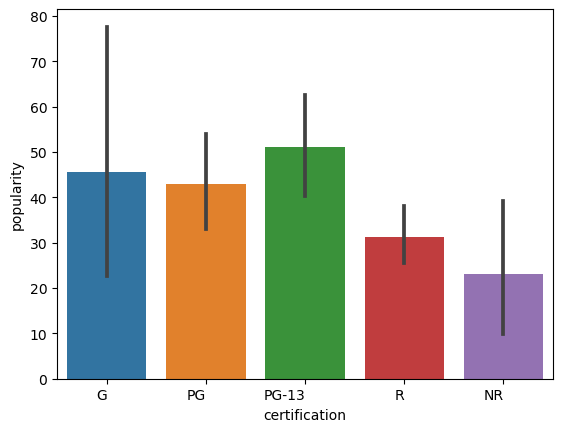

In [76]:
ax = sns.barplot(data=df, x='certification', y='popularity')
ax.set_xticklabels(ax.get_xticklabels(), ha='right');

In [77]:
needed_cols =  ['certification','popularity']
df[needed_cols]

,certification,popularity
imdb_id,,
tt0377981,G,36.419
tt0448694,PG,74.215
tt0458339,PG-13,51.246
tt0472181,PG,39.968
tt0472399,R,45.577
...,...,...
tt2105044,R,22.302
tt2109184,R,23.422
tt2215285,PG-13,34.756


In [78]:
## Create a dictionary
groups ={}

for certification in df['certification'].unique():
    temp = df.loc[df['certification']== certification, 'popularity']
    groups[certification] = temp

groups.keys()

dict_keys(['G', 'PG', 'PG-13', 'R', 'NR'])

3:Testing Assumptions

In [79]:
## Loop through groups dict
for certification, data in groups.items():

    ## determine if there are any outliers
    outliers = np.abs(stats.zscore(data)) > 3
    
    ## print a statement about how many outliers for which group name
    print(f"There were {outliers.sum()} outliers in the {certification} group.")

    ## Remove the outiers from data and overwrite the sector data in the dict
    data = data.loc[~outliers]
    groups[certification] = data

There were 0 outliers in the G group.
There were 0 outliers in the PG group.
There were 0 outliers in the PG-13 group.
There were 0 outliers in the R group.
There were 0 outliers in the NR group.


In [80]:
## Running normal test on each group and confirming there are >20 in each group

## Save a list with an inner list of column names
norm_results = [['group','n','pval','sig?']]


## loop through group dict
for certification, data in groups.items():
    ## calculate normaltest results
    stat, p = stats.normaltest(data)
    
    ## Append the right info into norm_resutls (as a list)
    norm_results.append([certification,len(data), p, p<.05])
    
    
## Make norm_results a dataframe (first row is columns, everything else data)
normal_results = pd.DataFrame(norm_results[1:], columns = norm_results[0])
normal_results

ValueError: skewtest is not valid with less than 8 samples; 4 samples were given.

In [81]:
## Use Levene's test for equal variance
result = stats.levene(*groups.values())
print(result)

LeveneResult(statistic=2.025775239670661, pvalue=0.09935978580804959)


In [82]:
## Use an if-else to help interpret the p-value
if result.pvalue < .05:
    print(f"The groups do NOT have equal variance.")
else:
    print(f"The groups DO have equal variance.")

The groups DO have equal variance.


In [83]:
# perform the correct hypothesis test
# note again the use of the * operator for convenience
result = stats.f_oneway( *groups.values())
result

F_onewayResult(statistic=3.089879188182048, pvalue=0.02067189840935725)

In [84]:
## slice a test 
temp = groups["G"]
temp

imdb_id
tt0377981    36.419
tt1216475    91.340
tt1739212    17.913
tt1961324    36.959
Name: popularity, dtype: float64

In [85]:
## test making a datafrae 
pd.DataFrame({'popularity':temp, 'certification':'G'})

,popularity,certification
imdb_id,,
tt0377981,36.419,G
tt1216475,91.340,G
tt1739212,17.913,G
tt1961324,36.959,G


In [86]:
## make a list for saving the dataframes to
tukeys_dfs = []

## Loop through groups dict's items
for certification, temp in groups.items():
    
    ## make a temp_df with the data and the sector name
    temp_df = pd.DataFrame({'popularity':temp, 'certification':certification})
    
    ## append to tukeys_dfs
    tukeys_dfs.append(temp_df)
    
## concatenate them into 1 dataframe    
tukeys_data = pd.concat(tukeys_dfs)
tukeys_data

,popularity,certification
imdb_id,,
tt0377981,36.419,G
tt1216475,91.340,G
tt1739212,17.913,G
tt1961324,36.959,G
tt0448694,74.215,PG
...,...,...
tt1637725,69.677,NR
tt1844025,11.658,NR
tt2005156,7.165,NR


In [87]:
## save the values 
values = tukeys_data['popularity']
labels = tukeys_data['certification']

## perform tukey's multiple comparison test and display the summary
tukeys_results = pairwise_tukeyhsd(values,labels)
tukeys_results.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
G,NR,-22.5464,0.5884,-65.5755,20.4828,False
G,PG,-2.7837,0.9996,-42.0638,36.4963,False
G,PG-13,5.4341,0.9942,-32.0437,42.912,False
G,R,-14.3513,0.8292,-52.4171,23.7145,False
NR,PG,19.7626,0.3724,-10.6636,50.1888,False
NR,PG-13,27.9805,0.051,-0.0805,56.0416,False
NR,R,8.1951,0.9315,-20.6465,37.0366,False
PG,PG-13,8.2179,0.8312,-13.6645,30.1003,False
PG,R,-11.5676,0.621,-34.4423,11.3071,False
PG-13,R,-19.7855,0.0471,-39.4049,-0.1661,True


In [88]:
## optional -slicing out dataframe from results
summary = tukeys_results.summary()
tukeys_df = pd.DataFrame(summary.data[1:], columns=summary.data[0])
tukeys_df

,group1,group2,meandiff,p-adj,lower,upper,reject
0,G,NR,-22.5464,0.5884,-65.5755,20.4828,False
1,G,PG,-2.7837,0.9996,-42.0638,36.4963,False
2,G,PG-13,5.4341,0.9942,-32.0437,42.9120,False
3,G,R,-14.3513,0.8292,-52.4171,23.7145,False
4,NR,PG,19.7626,0.3724,-10.6636,50.1888,False
5,NR,PG-13,27.9805,0.0510,-0.0805,56.0416,False
6,NR,R,8.1951,0.9315,-20.6465,37.0366,False
7,PG,PG-13,8.2179,0.8312,-13.6645,30.1003,False
8,PG,R,-11.5676,0.6210,-34.4423,11.3071,False
9,PG-13,R,-19.7855,0.0471,-39.4049,-0.1661,True


C:\Users\12103\AppData\Local\Temp\ipykernel_16544\4131889640.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 68)` for the same effect.

  ax = sns.barplot(data=tukeys_data, x='certification', y='popularity', ci=68)


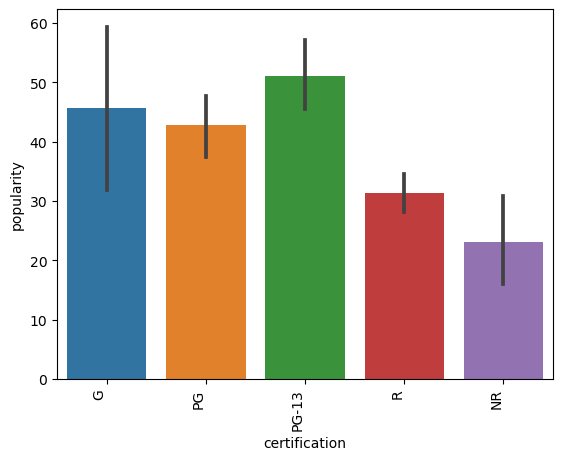

In [89]:
## make a barplot of final data to go with results
ax = sns.barplot(data=tukeys_data, x='certification', y='popularity', ci=68)
ax.set_xticklabels(ax.get_xticklabels(), rotation='vertical', ha='right');

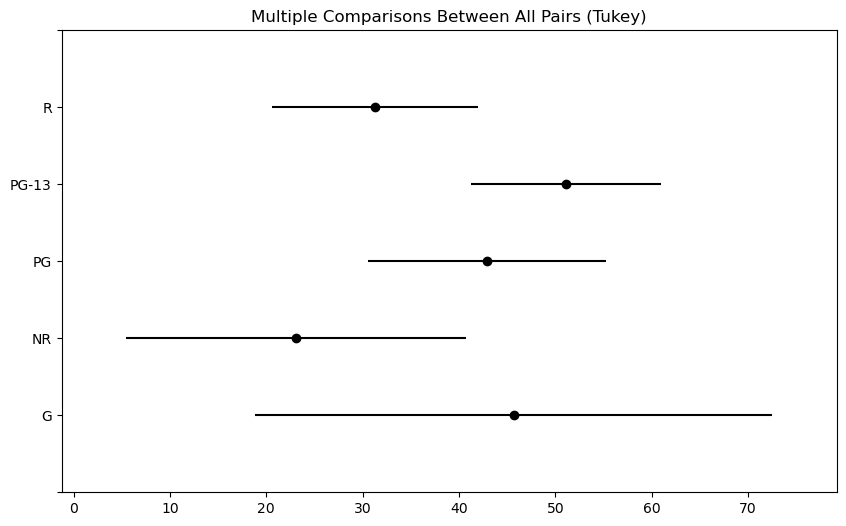

In [90]:
## also can use built-in plot tukeys_reuslts.plot_simultaneous
tukeys_results.plot_simultaneous();

**Certification DOES have a significant impact on popularity. The lowest is 'NR' and highest is 'PG-13'**